In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
from io import StringIO
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.patches as patches
%matplotlib inline

In [3]:
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
file_to_use = 'YTim7zUFj1f4_50.000_60.000.wav'

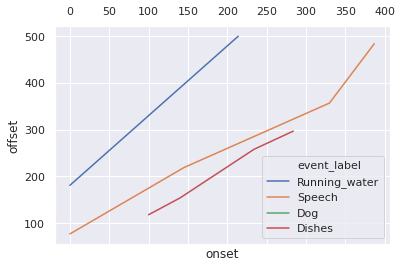

In [3]:
data="""/mnt/lustre/sjtu/shared/data/raa/DCASE18/task4/data/audio/eval/YTim7zUFj1f4_50.000_60.000.wav   0.0     3.616   Running_water
/mnt/lustre/sjtu/shared/data/raa/DCASE18/task4/data/audio/eval/YTim7zUFj1f4_50.000_60.000.wav   0.0     1.5319999999999998      Speech
/mnt/lustre/sjtu/shared/data/raa/DCASE18/task4/data/audio/eval/YTim7zUFj1f4_50.000_60.000.wav   0.8490000000000001      1.6569999999999998      Dog
/mnt/lustre/sjtu/shared/data/raa/DCASE18/task4/data/audio/eval/YTim7zUFj1f4_50.000_60.000.wav   1.995   2.363   Dishes
/mnt/lustre/sjtu/shared/data/raa/DCASE18/task4/data/audio/eval/YTim7zUFj1f4_50.000_60.000.wav   2.7910000000000004      3.088   Dishes
/mnt/lustre/sjtu/shared/data/raa/DCASE18/task4/data/audio/eval/YTim7zUFj1f4_50.000_60.000.wav   2.892   4.388   Speech
/mnt/lustre/sjtu/shared/data/raa/DCASE18/task4/data/audio/eval/YTim7zUFj1f4_50.000_60.000.wav   4.276   10.0    Running_water
/mnt/lustre/sjtu/shared/data/raa/DCASE18/task4/data/audio/eval/YTim7zUFj1f4_50.000_60.000.wav   4.685   5.166   Dishes
/mnt/lustre/sjtu/shared/data/raa/DCASE18/task4/data/audio/eval/YTim7zUFj1f4_50.000_60.000.wav   5.6770000000000005      5.944   Dishes
/mnt/lustre/sjtu/shared/data/raa/DCASE18/task4/data/audio/eval/YTim7zUFj1f4_50.000_60.000.wav   6.591   7.144   Speech
/mnt/lustre/sjtu/shared/data/raa/DCASE18/task4/data/audio/eval/YTim7zUFj1f4_50.000_60.000.wav   7.749   9.673   Speech
"""
# dcase18_df = pd.read_csv('dcase18.tsv',sep='\t')
df = pd.read_csv(StringIO(data),sep='\s+',names=['filename','onset','offset','event_label'])
df['filename'] = df['filename'].apply(lambda x: Path(x).name)
df['onset'] = (df['onset']/0.02).round().astype(int)
df['offset'] = (df['offset']/0.02).round().astype(int)
df['len'] = df['offset'] - df['onset']
sns.set()
sns.lineplot(data=df, x='onset',y='offset',hue='event_label')

In [12]:
data="""Y0eh_N-cmcuI_350.000_360.000.wav	0.467	0.717	Alarm_bell_ringing
Y0eh_N-cmcuI_350.000_360.000.wav	1.919	10.000	Running_water
Y0eh_N-cmcuI_350.000_360.000.wav	5.418	5.863	Speech
Y0eh_N-cmcuI_350.000_360.000.wav	7.790	10.000	Speech"""

prediction_data = "Y0eh_N-cmcuI_350.000_360.000.wav\t8.620000000000001\t9.82\tSpeech"
df = pd.read_csv(StringIO(data),sep='\t',names=['filename','onset','offset','event_label'])
df['onset'] = (df['onset']/0.02).round().astype(int)
df['offset'] = (df['offset']/0.02).round().astype(int)
df['len'] = df['offset'] - df['onset']
df=df[df['event_label'] == 'Speech']

In [13]:
wav,sr = librosa.load(file_to_use)
feat = np.log(librosa.feature.melspectrogram(wav, hop_length=int(sr*0.02), n_mels=64)+ 1e-12)
fig, ax =plt.subplots(1, figsize=(7,10))
# plt.xticks(np.arange(0, feat.shape[-1], step=8))
# plt.xlabel([0, ])
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(feat, origin='lower')
ax.set_aspect(aspect=4.5)

In [14]:
# Create figure and axes
fig,ax = plt.subplots(1,figsize=(7,10))
labels = df['event_label'].unique()
colors = sns.color_palette('husl',len(labels))
for k, row in df.iterrows():
    c = np.argwhere(labels == row['event_label'])[0,0]
    rect = patches.Rectangle((row.onset,0),row.len,64,linewidth=2,edgecolor=colors[c],facecolor='#ff8c69',alpha=0.6)
    mid = row.onset + row.len//2
    # Add the patch to the Axes
    ax.annotate(row.event_label, (mid, 32 + 7 * c), color='w', weight='bold', 
                fontsize=16, ha='center', va='center')
    ax.add_patch(rect)
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(feat, origin='lower')
ax.set_aspect(aspect=4.5)